In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
data=pd.read_csv('Sales_data_zone_wise.csv')

In [5]:
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [21]:
df=pd.DataFrame(data)

In [20]:
data.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

In [93]:
df_new= df[['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D']]

# The mean sales generated by each zone.

In [94]:
df_new.mean()

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64

<AxesSubplot:>

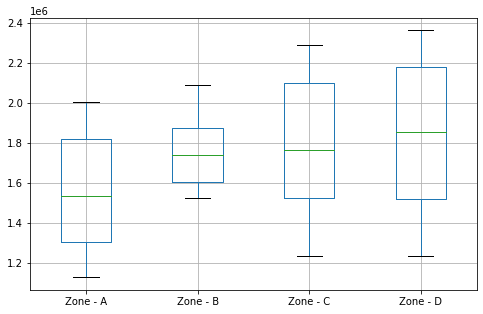

In [95]:
df_new.boxplot()

Zone-D has the highest mean sales among the four zones

# Total sales generated by all the zones for each month.

In [49]:
df1 =df.set_index('Month').sum(axis = 1,numeric_only=True)
df1

Month
Month - 1      7022544.0
Month - 2     14304606.0
Month - 3     12951878.0
Month - 4     16348898.0
Month - 5      5995328.0
Month - 6      7151387.0
Month - 7      7287108.0
Month - 8      7816299.0
Month - 9      6703395.0
Month - 10     7128210.0
Month - 11     7032783.0
Month - 12     6111084.0
Month - 13     5925424.0
Month - 14     7155515.0
Month - 15     5934156.0
Month - 16     6506659.0
Month - 17     7149383.0
Month - 18     7083490.0
Month - 19     6971953.0
Month - 20     7124599.0
Month - 21     7389597.0
Month - 22     7560001.0
Month - 23     6687919.0
Month - 24     7784747.0
Month - 25     6095918.0
Month - 26     6512360.0
Month - 27     6267918.0
Month - 28     7470920.0
Month - 29     6772277.0
dtype: float64

<AxesSubplot:xlabel='Month'>

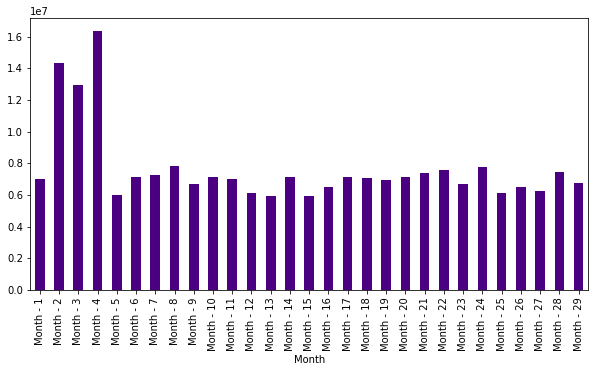

In [73]:
df1.plot(kind='bar',figsize=(10,5),color='indigo')

From above analysis, Month-4 has the highest total sales

# Check whether all the zones generate the same amount of sales.

Here, we are using ANOVA test

In [74]:
#Ho: all the zones generate the same amount of sales
#Ha: all zones generate different amount of sales

In [75]:
from scipy.stats import f_oneway

In [89]:
statistics,pvalue = f_oneway(data['Zone - A'], data['Zone - B'], data['Zone - C'],data['Zone - D'])
alpha = 0.05
print("The p value is",pvalue)

The p value is 0.0011827601694503335


In [78]:
if pvalue > alpha:
    print("Fail to reject the Null Hypothesis")
else:
    print ("Reject the Null Hypothesis")

Reject the Null Hypothesis


Acc to analysis since p value < alpha, we reject the null hypothesis which implies that ALL ZONES GENERATE DIFFERENT AMOUNT OF SALES